In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 1

В качестве исходных данных имеется датафрейм, который содержит информацию о количестве сделок по продаже недвижимости и их суммарной выручке в течение года. Необходимо построить график, на котором одновременно будут отображаться выручка в млн руб. (линейный график) и количество сделок (столбчатая диаграмма). Вводные по визуализации:
- линейный график: линия сплошная, красный цвет, маркер 'o', толщина линии 1.5
- столбчатая диаграмма: синий цвет, прозрачность 0.2
- для дублирования осей использовать метод twinx()
- подписать ось1 'выручка, млн руб.', ось2 'количество сделок', ось Х 'месяц'
- название графика 'Годовая динамика продаж в секторе недвижимости'

In [ ]:
df = pd.DataFrame({'month':[1,2,3,4,5,6,7,8,9,10,11,12],
                   'orders':[2,5,8,12,15,8,17,8,5,10,7,9],
                  'revenue': [100, 250, 170, 300, 480, 360, 560, 340, 350, 280, 160, 140]})

Text(0.5, 1.0, 'Годовая динамика продаж в секторе недвижимости')

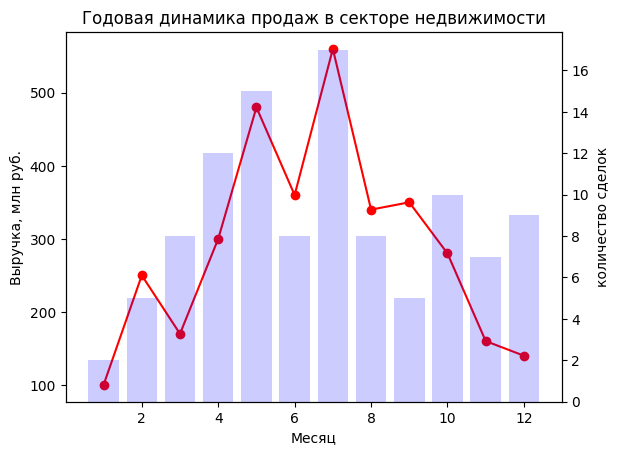

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['month'], df['revenue'], color = 'red', linestyle = '-', marker = 'o')
ax.set_xlabel('Месяц')
ax.set_ylabel('Выручка, млн руб.')
ax1 = ax.twinx()
ax1.bar(df['month'], df['orders'], color = 'blue', alpha = 0.2)
ax1.set_ylabel('количество сделок')
ax.set_title('Годовая динамика продаж в секторе недвижимости')

# Task 2

Построй график, на котором 2 линии будут отображать количество выпущенных фильмов и сериалов по годам, начиная с 2000 года. Предварительно преобразуй столбец с годом выпуска в строку. Подпиши оси и название графика. отобрази легенду.

In [ ]:
data = pd.read_csv('~/datasets/netflix_titles.csv')

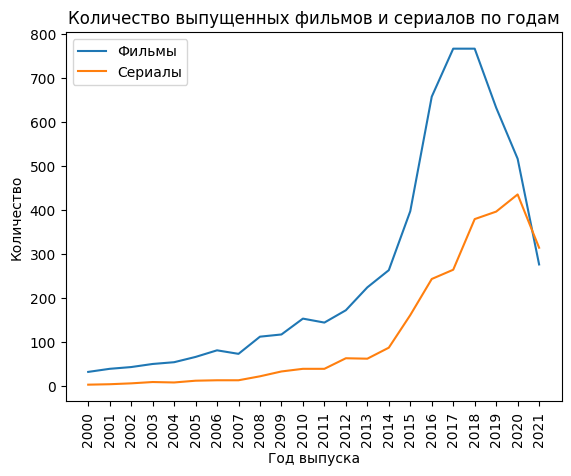

In [132]:
data['release_year'] = data['release_year'].astype(str)
gdata = data.groupby(['release_year','type']).size().reset_index(name='counts')
gdata = gdata[gdata['release_year'].astype(int) >=2000]
movie_table = gdata[gdata['type'] == 'Movie']
tvshows_table = gdata[gdata['type'] == 'TV Show']
fig, ax = plt.subplots()
ax.plot(movie_table['release_year'], movie_table['counts'], label = 'Фильмы')
ax.plot(tvshows_table['release_year'], tvshows_table['counts'], label = 'Сериалы')
plt.xticks(rotation=90) 
ax.set_title('Количество выпущенных фильмов и сериалов по годам')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество')
ax.legend()

# Task 3

Используя метод fill_between(), закрась пространство под графиками из задания 2 до оси X в цвет линии графика и прозрачностью 0.1. В результате должно получиться 2 области, которые перекрывают друг друга.

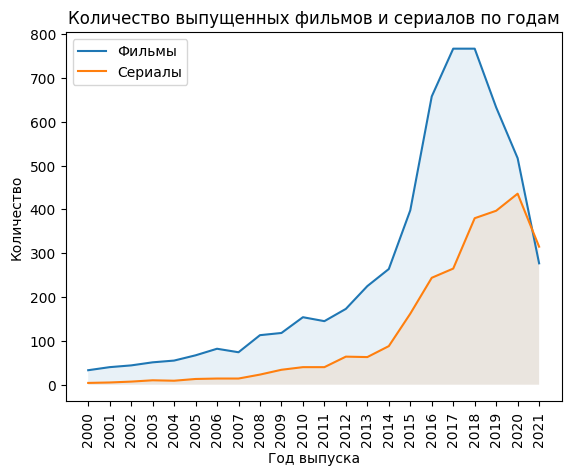

In [ ]:
data['release_year'] = data['release_year'].astype(str)
gdata = data.groupby(['release_year','type']).size().reset_index(name='counts')
gdata = gdata[gdata['release_year'].astype(int) >=2000]
movie_table = gdata[gdata['type'] == 'Movie']
tvshows_table = gdata[gdata['type'] == 'TV Show']
fig, ax = plt.subplots()
ax.plot(movie_table['release_year'], movie_table['counts'], label = 'Фильмы')
ax.plot(tvshows_table['release_year'], tvshows_table['counts'], label = 'Сериалы')
plt.xticks(rotation=90) 
ax.set_title('Количество выпущенных фильмов и сериалов по годам')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество')
ax.legend()
ax.fill_between(movie_table['release_year'], movie_table['counts'], alpha = 0.1)
ax.fill_between(tvshows_table['release_year'], tvshows_table['counts'], alpha = 0.1)

# Task 4

Измени график: 

- отсортируй стоблцы по возврастанию;
- раскрась столбцы по возрастанию при помощи matplotlib.colormaps 'hsv', используй для кодирования цветов значения df["counts"];
- смести подписи значений столбцов в центр столбца и замени цвет шрифта на белый (не забудь изменить verticalalignment, чтобы подписи были точно по центру).

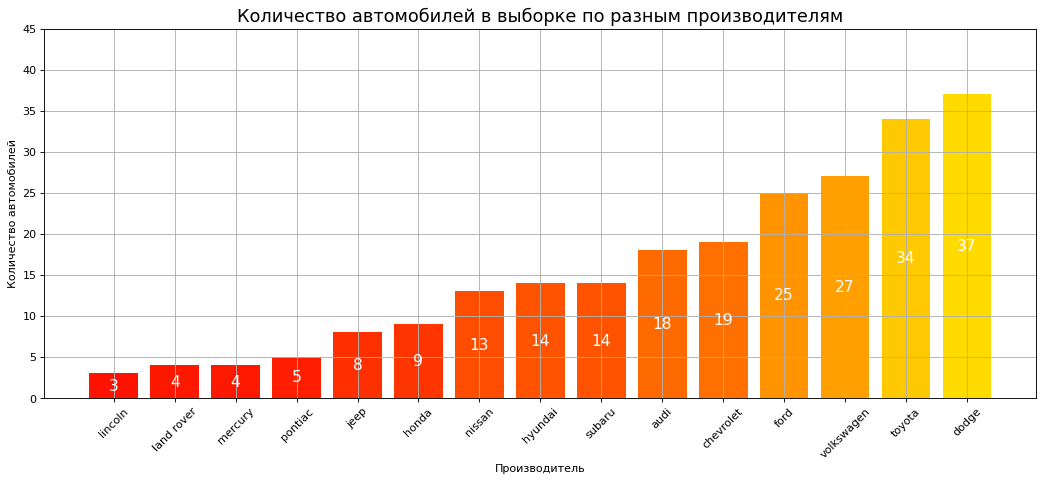

In [ ]:
df_raw = pd.read_csv("~/datasets/project12_auto.csv")
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
df = df.sort_values(by='counts')
plt.figure(figsize=(16,6), dpi= 80)
plt.bar(df['manufacturer'], df["counts"], color = plt.cm.hsv(df["counts"]))

for i, val in enumerate(df['counts'].values):
    plt.text(i, val/2, int(val), 
             horizontalalignment='center', 
             verticalalignment='center', fontsize = 14, color = 'white')
    
plt.title("Количество автомобилей в выборке по разным производителям", fontsize=16)
plt.ylabel('Количество автомобилей')
plt.xlabel('Производитель')
plt.xticks(rotation = 45)
plt.ylim(0, 45)
plt.grid()
plt.show()

# Дополнительное задание

Выбери фильмы и сериалы какого-нибудь из жанров в датасете netflix_titles.csv и построй облако тегов на основе их описаний.

Для этого задания дополнительно понадобится установить библиотеки wordcloud и stop_words.

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
data = pd.read_csv('~/datasets/netflix_titles.csv')

(-0.5, 399.5, 199.5, -0.5)

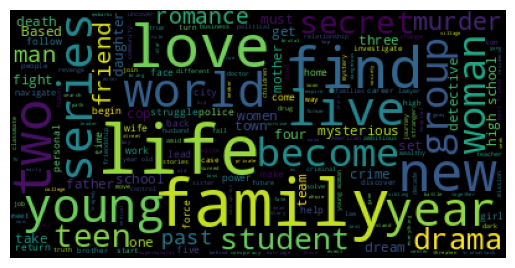

In [ ]:
stop_words = stopwords.words('english')
dt = data[data['listed_in'].str.contains('TV Dramas')]['description'].reset_index(name='tags')
text = ' '.join(dt['tags'])
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')